In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from data_preprocessing_final import cleaning, initiate_data
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

In [6]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col = 0)

In [7]:
train_data_linear, train_target_linear, test_data_linear, test_target_linear, train_data_tree, train_target_tree, test_data_tree, test_target_tree = initiate_data(housing)

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:488

In [16]:
X_train = train_data_tree.drop('PID', axis = 1)
y_train = train_target_tree
X_train

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Bsmt_Unfin_Ratio,TotalLivArea,TotalBath
0,0.0,1.0,3.0,4.0,0.0,14.0,0.0,0.0,2.0,0.0,...,0.491228,0.181452,0.000000,0.000000,0.133399,0.0,0.000000,-0.166667,1600.0,-0.054562
1,6.0,1.0,3.0,4.0,0.0,20.0,2.0,0.0,2.0,0.0,...,0.350877,0.322581,0.000000,0.000000,0.181818,0.0,0.000000,0.000000,1936.0,-0.054644
2,6.0,1.0,3.0,0.0,0.0,20.0,2.0,0.0,5.0,0.0,...,0.789474,0.290323,0.000000,0.503509,0.000000,0.0,0.000000,0.000000,3366.0,-0.054480
3,5.0,0.0,3.0,4.0,0.0,19.0,2.0,0.0,2.0,1.0,...,0.991228,0.622984,0.117978,0.078947,0.000000,0.0,0.000000,-0.097278,3482.0,-0.054316
4,5.0,1.0,3.0,4.0,0.0,7.0,2.0,0.0,0.0,0.0,...,0.701754,0.387097,0.000000,0.000000,0.042490,0.0,0.204082,-0.043470,2252.0,-0.054480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,5.0,0.0,3.0,4.0,0.0,5.0,2.0,0.0,2.0,0.0,...,0.982456,0.580645,0.117978,0.052632,0.000000,0.0,0.000000,0.000000,3230.0,-0.054480
1922,5.0,0.0,0.0,4.0,1.0,21.0,2.0,0.0,0.0,0.0,...,0.394737,0.155242,0.000000,0.000000,0.044466,0.0,0.000000,-0.102222,1519.0,-0.054644
1923,5.0,1.0,0.0,4.0,1.0,22.0,3.0,0.0,2.0,1.0,...,0.535088,0.217070,0.000000,0.000000,0.000000,0.0,0.000000,-0.122043,2615.0,-0.054480
1924,5.0,1.0,3.0,4.0,0.0,15.0,2.0,0.0,2.0,0.0,...,0.500000,0.161290,0.000000,0.000000,0.000000,0.0,0.000000,-0.034259,1602.0,-0.054480


In [17]:
X_test = test_data_tree.drop('PID', axis = 1)
y_test = test_target_tree
X_test

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Bsmt_Unfin_Ratio,TotalLivArea,TotalBath
0,5.0,0.0,3.0,4.0,0.0,8.0,2.0,0.0,5.0,0.0,...,0.894737,0.268817,0.295646,0.126316,0.0,0.0,0.000000,-0.143501,2338.0,-0.054234
1,5.0,1.0,3.0,4.0,0.0,15.0,2.0,0.0,2.0,1.0,...,0.535088,0.214382,0.000000,0.000000,0.0,0.0,0.587755,-0.080929,2010.0,-0.054644
2,5.0,1.0,3.0,4.0,0.0,23.0,2.0,0.0,5.0,0.0,...,0.850877,0.325269,0.000000,0.217544,0.0,0.0,0.000000,-0.084757,2364.0,-0.054398
3,6.0,1.0,3.0,2.0,0.0,3.0,1.0,0.0,2.0,0.0,...,0.614035,0.295699,0.000000,0.000000,0.0,0.0,0.000000,-0.058952,2446.0,-0.054644
4,6.0,1.0,3.0,4.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.403509,0.161290,0.000000,0.000000,0.0,0.0,0.000000,-0.148810,1882.0,-0.054644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,5.0,0.0,3.0,4.0,0.0,5.0,2.0,0.0,5.0,0.0,...,0.938596,0.318548,0.101124,0.168421,0.0,0.0,0.000000,0.000000,2712.0,-0.054398
478,5.0,0.0,3.0,4.0,0.0,17.0,2.0,0.0,2.0,0.0,...,0.771930,0.401882,0.106742,0.000000,0.0,0.0,0.000000,-0.098810,2520.0,-0.054316
479,5.0,1.0,3.0,0.0,0.0,22.0,1.0,0.0,2.0,0.0,...,0.596491,0.322581,0.000000,0.140351,0.0,0.0,0.000000,-0.096789,2242.0,-0.054480
480,5.0,0.0,3.0,1.0,0.0,5.0,2.0,0.0,5.0,0.0,...,0.903509,0.358871,0.000000,0.129825,0.0,0.0,0.000000,-0.124658,2606.0,-0.054234


In [15]:
# Setting up Parameters

gbr = GradientBoostingRegressor()
parameters = {
    "n_estimators":[800, 850, 900, 950],
    "max_depth":[4, 5, 6],
    "learning_rate":[0.005, 0.01, 0.025, 0.05, 0.075],
    "subsample":[0.4, 0.6, 0.7],
    "max_features":[7, 8]
}

grid_search = GridSearchCV(estimator = gbr, param_grid = parameters, n_jobs = -1, cv = 5)

In [10]:
grid_search.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.01, 0.025, 0.05, 0.075],
                         'max_depth': [4, 5, 6], 'max_features': [7, 8],
                         'n_estimators': [800, 850, 900, 950],
                         'subsample': [0.4, 0.6, 0.7]})>

In [18]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.01, 0.025, 0.05, 0.075],
                         'max_depth': [4, 5, 6], 'max_features': [7, 8],
                         'n_estimators': [800, 850, 900, 950],
                         'subsample': [0.4, 0.6, 0.7]})

In [19]:
# Getting the best estimator

beast = grid_search.best_estimator_
beast

GradientBoostingRegressor(learning_rate=0.025, max_depth=5, max_features=8,
                          n_estimators=800, subsample=0.6)

In [20]:
beast.score(X_train, y_train)

0.9915278673392799

### NEW HIGH SCORE???

In [21]:
beast.score(X_test, y_test)

0.9356695116314289

In [20]:
beast.feature_importances_

array([0.02323326, 0.03495191, 0.04260927, 0.03156637, 0.02790287,
       0.00734844, 0.02386524, 0.029228  , 0.02572153, 0.0652277 ,
       0.01364038, 0.01847876, 0.00279728, 0.00023405, 0.00617811,
       0.07500024, 0.00756692, 0.19679228, 0.0043762 , 0.00442304,
       0.00257419, 0.00110547, 0.00170287, 0.01095565, 0.00248238,
       0.00242639, 0.00203663, 0.00184172, 0.00519482, 0.00275241,
       0.00128714, 0.05500437, 0.00081351, 0.00688111, 0.04412126,
       0.00074773, 0.00976637, 0.00353567, 0.00165832, 0.00175216,
       0.00359002, 0.03063032, 0.00189497, 0.00401266, 0.00914904,
       0.00647522, 0.00099745, 0.00299769, 0.00066596, 0.        ,
       0.00412657, 0.11916549, 0.00978037, 0.00348361, 0.00324859])

In [21]:
feature_importance = beast.feature_importances_


importantfeats = pd.Series(data = feature_importance, index = X_train.columns).sort_values(ascending = False)

<AxesSubplot:>

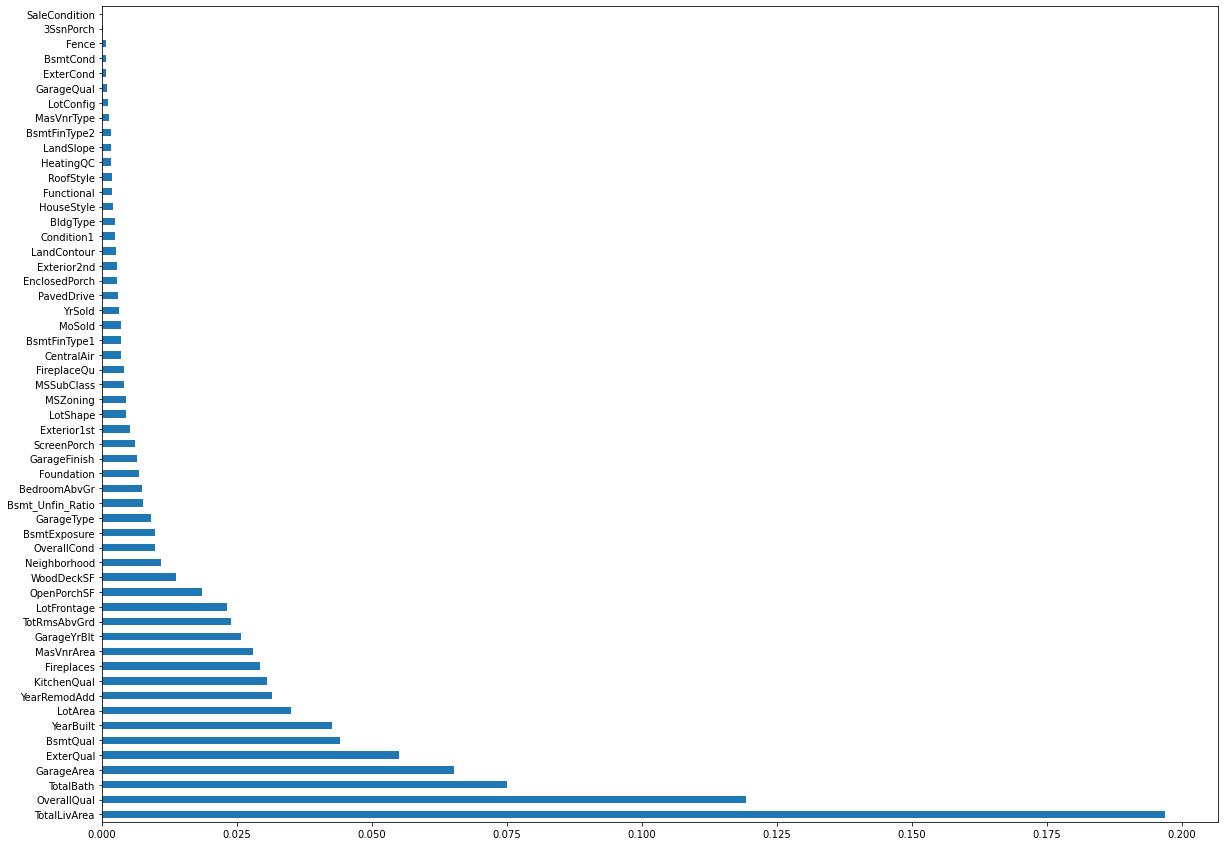

In [22]:
importantfeats.plot.barh(figsize = (20, 15))


In [22]:
gbpred = grid_search.predict(X_test)
gbpred

array([12.13404354, 11.80881088, 12.08178515, 11.623167  , 11.69884716,
       12.58443665, 12.10094597, 12.35835005, 12.34021676, 12.31082975,
       11.70131686, 12.37713646, 12.39182578, 12.08108329, 11.5129012 ,
       12.11392982, 11.79764304, 12.24216689, 11.75042158, 12.06588925,
       12.40805157, 12.879894  , 12.45058535, 11.2446004 , 11.75426126,
       11.43462799, 12.02998252, 12.11774638, 11.72053267, 11.31690845,
       12.13313584, 12.49977419, 11.671041  , 11.8845586 , 11.86993939,
       12.09931881, 12.34442225, 12.66849222, 12.00139427, 11.38325905,
       11.72786354, 11.60817233, 11.60588849, 12.19852633, 12.75951599,
       12.22990286, 12.16382729, 11.66562319, 12.60707084, 12.24548176,
       11.87275066, 12.49752906, 11.88000845, 12.20785455, 11.64990542,
       11.61536006, 11.71240132, 11.72465838, 12.24832928, 11.09137935,
       12.40427162, 12.16052088, 12.14955055, 12.26170047, 11.15111787,
       12.32288886, 11.22534437, 11.29026184, 11.78028943, 12.02

## STACKING THEM MODELS

In [20]:
ytest = pd.read_csv('newytest.csv')
ytest = np.exp(ytest)
ytest['gbpred'] = gbpred
ytest['overallpred'] = ytest.iloc[:, 1:4].mean(axis=1)
ytest

,SalePrice,lassopred,svrpred,gbpred,overallpred
0,183500.0,184305.624807,182964.208105,191926.294159,186398.709024
1,133500.0,147092.849102,149663.246905,131235.937149,142664.011052
2,175900.0,184090.234239,185042.534438,175933.735661,181688.834779
3,100000.0,83013.512331,85001.821476,109403.075135,92472.802981
4,124000.0,127605.050244,130178.053857,122098.216202,126627.106768
...,...,...,...,...,...
477,192500.0,196491.626949,199577.134996,203897.364595,199988.708847
478,181900.0,189920.486850,190714.034580,189536.096221,190056.872550
479,139000.0,120076.056059,120314.315597,129018.634618,123136.335425
480,217000.0,207681.224454,200695.663859,211929.990576,206768.959630


# HIGH SCORE??

In [21]:
from sklearn.metrics import r2_score

ytrue = ytest["SalePrice"].tolist()
ypred = ytest["overallpred"].tolist()
r2 = r2_score(ytrue, ypred)
r2

0.9270102255127566